# 1. Import Packages <a class="anchor" id="1-bullet"></a>

In [176]:
from collections import namedtuple
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Data Preparation <a class="anchor" id="2-bullet"></a>

## 2.1 Load Dataset <a class="anchor" id="2.1-bullet"></a>

In [177]:
# Loan Datasets
path = '../data/MobileCardVoucher.csv'
mobile_card = pd.read_csv(path,parse_dates = True, index_col = 'Date')

In [178]:
print("# of observations & # of features", mobile_card.shape)
mobile_card = mobile_card.reset_index()
mobile_card.head()

# of observations & # of features (5479, 4)


,Date,No,VoucherType,Quantity,Sales
0,2022-02-06,1,5 Birr,43413,217065
1,2022-02-06,2,15 Birr,38329,574935
2,2022-02-06,3,10 Birr,86119,861190
3,2022-02-06,4,50 Birr,9942,497100
4,2022-02-06,5,25 Birr,28159,703975


In [179]:
mobile_card.describe() 

,No,Quantity,Sales
count,5479.000000,5479.000000,5.479000e+03
mean,2740.000000,24594.336923,3.770575e+05
std,1581.795393,33353.079111,3.795298e+05
min,1.000000,1.000000,1.000000e+02
25%,1370.500000,10.000000,5.500000e+03
50%,2740.000000,10621.000000,3.132750e+05
75%,4109.500000,38429.000000,6.093000e+05
max,5479.000000,377301.000000,3.773010e+06


## 2.2 Dealing With Missing Values <a class="anchor" id="2.2-bullet"></a>

In [180]:
print("Mobile card:\n\n", mobile_card.isnull().sum())

Mobile card:

 Date           0
No             0
VoucherType    0
Quantity       0
Sales          0
dtype: int64


## 2.3 Drop Subsets Of Data Which Might Cause Bias <a class="anchor" id="2.5-bullet"></a>

In [181]:
# No column is not important  so we'll drop it
mobile_card = mobile_card.drop('No', axis=1)
# We have taken quantity instead of  Sales (calculated value) so we'll drop it.
mobile_card = mobile_card.drop('Sales', axis=1)

mobile_card.head()

,Date,VoucherType,Quantity
0,2022-02-06,5 Birr,43413
1,2022-02-06,15 Birr,38329
2,2022-02-06,10 Birr,86119
3,2022-02-06,50 Birr,9942
4,2022-02-06,25 Birr,28159


## 2.5 Feature Engineering <a class="anchor" id="2.6-bullet"></a>

In [182]:
# see what variables types we have
mobile_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5479 non-null   datetime64[ns]
 1   VoucherType  5479 non-null   object        
 2   Quantity     5479 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 128.5+ KB


#### 2.5.1. Generate unique  string number for each VoucherType

In [183]:
mobile_card_unique=mobile_card['VoucherType'].unique()
mobile_card_unique

array(['5 Birr', '15 Birr', '10 Birr', '50 Birr', '25 Birr', '100 Birr',
       '500 Birr', '1000 Birr', '250 Birr'], dtype=object)

In [184]:
def generateUniqueNumberForVoucherType(changedTo):
    mobile_card_unique=mobile_card['VoucherType'].unique()
    mobile_card_dictionary = {}
    for i in range(len(mobile_card_unique)):
        card = mobile_card_unique[i].split()
        if changedTo == 'str':
            mobile_card_dictionary[mobile_card_unique[i]]= str(card[0])
        else:
            mobile_card_dictionary[mobile_card_unique[i]]= int(card[0])
    return mobile_card_dictionary


#### 2.5.2 Replace Voucher Type to numeric string value

In [185]:
mobile_card_dictionary = generateUniqueNumberForVoucherType('str')
for key in mobile_card_dictionary.keys(): 
   mobile_card['VoucherType'] = mobile_card['VoucherType'].replace(key,mobile_card_dictionary[key])

mobile_card.head()

,Date,VoucherType,Quantity
0,2022-02-06,5,43413
1,2022-02-06,15,38329
2,2022-02-06,10,86119
3,2022-02-06,50,9942
4,2022-02-06,25,28159


In [186]:
# see what's in nominal varibles 
set(mobile_card.VoucherType)

{'10', '100', '1000', '15', '25', '250', '5', '50', '500'}

In [187]:
mobile_card.head()

,Date,VoucherType,Quantity
0,2022-02-06,5,43413
1,2022-02-06,15,38329
2,2022-02-06,10,86119
3,2022-02-06,50,9942
4,2022-02-06,25,28159


# 3. Exploratory Data Analysis
## 3.1  Sales by Voucher Type

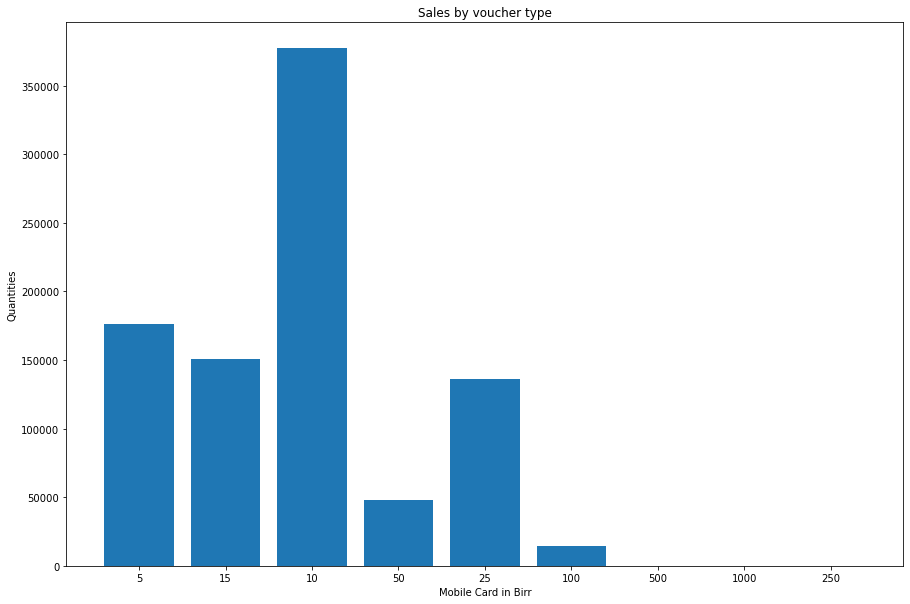

In [188]:
plt.figure(figsize=(15,10))
plt.bar(mobile_card.VoucherType,mobile_card.Quantity)
plt.title("Sales by voucher type")
plt.xlabel("Mobile Card in Birr")
plt.ylabel("Quantities")
plt.show()

# 4. Preprocess  the data compatabel for time series 

### 4.1 Filter Voucher airtime type from dataset and store it to birrs dataset 

In [189]:
# change voucher airtime to numeric
mobile_card_dictionary = generateUniqueNumberForVoucherType('int')
for key in mobile_card_dictionary.keys(): 
   mobile_card['VoucherType'] = mobile_card['VoucherType'].replace(key,mobile_card_dictionary[key])
mobile_card_dictionary

{'5': 5,
 '15': 15,
 '10': 10,
 '50': 50,
 '25': 25,
 '100': 100,
 '500': 500,
 '1000': 1000,
 '250': 250}

In [190]:
birr_5_dataset = mobile_card.query('VoucherType ==5')
birr_10_dataset = mobile_card.query('VoucherType ==10')
birr_15_dataset = mobile_card.query('VoucherType ==15')
birr_25_dataset = mobile_card.query('VoucherType ==25')
birr_50_dataset = mobile_card.query('VoucherType ==50')

birr_10_dataset

,Date,VoucherType,Quantity
2,2022-02-06,10,86119
12,2022-02-05,10,148400
19,2022-02-04,10,124414
29,2022-02-03,10,137473
36,2022-02-02,10,115461
...,...,...,...
5448,2020-05-12,10,5759
5456,2020-05-11,10,5769
5461,2020-05-10,10,2742
5469,2020-05-09,10,2035


### 4.2 Smoothining the voucher quantity data

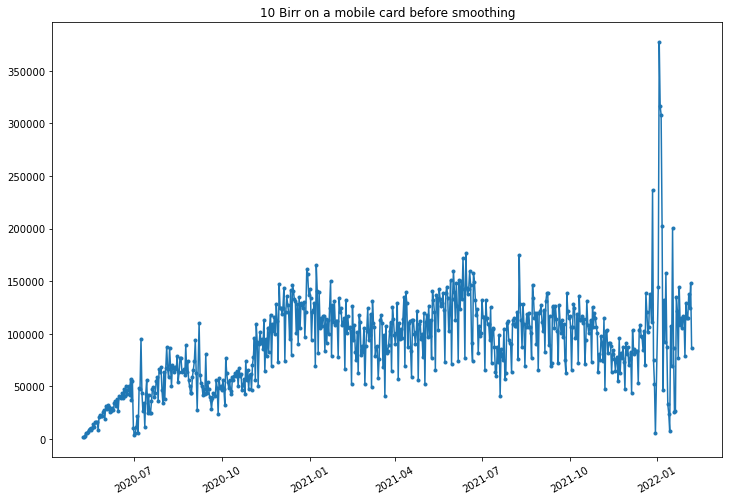

In [191]:
# Before smoothing
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(birr_10_dataset['Date'], birr_10_dataset['Quantity'], '-o', markersize=3, label='true')
plt.title("10 Birr on a mobile card before smoothing")
plt.xticks(rotation=30)
plt.show()

In [192]:
#Moving average Method implementation

def moving_avarage_smoothing(X,k):
	S = np.zeros(X.shape[0])
	for t in range(X.shape[0]):
		if t < k:
			S[t] = np.mean(X[:t+1])
		else:
			S[t] = np.sum(X[t-k:t])/k
	return S

In [193]:
#Make smoothing
window = 10
birr_10_dataset['Quantity']=moving_avarage_smoothing(birr_10_dataset['Quantity'],window)
birr_5_dataset['Quantity']=moving_avarage_smoothing(birr_5_dataset['Quantity'],window)
birr_15_dataset['Quantity']=moving_avarage_smoothing(birr_15_dataset['Quantity'],window)
birr_25_dataset['Quantity']=moving_avarage_smoothing(birr_25_dataset['Quantity'],window)
birr_50_dataset['Quantity']=moving_avarage_smoothing(birr_50_dataset['Quantity'],window)

<ipython-input-193-62a233f606c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birr_10_dataset['Quantity']=moving_avarage_smoothing(birr_10_dataset['Quantity'],window)
<ipython-input-193-62a233f606c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birr_5_dataset['Quantity']=moving_avarage_smoothing(birr_5_dataset['Quantity'],window)
<ipython-input-193-62a233f606c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

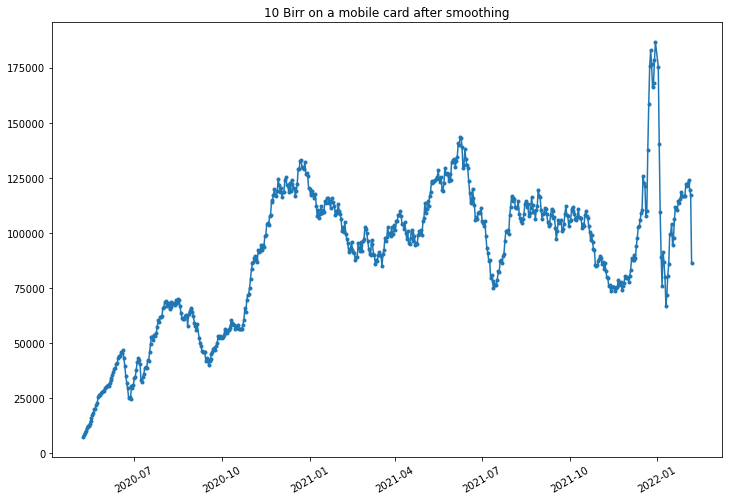

In [194]:
# After smoothing
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(birr_10_dataset['Date'], birr_10_dataset['Quantity'], '-o', markersize=3, label='true')
plt.title("10 Birr on a mobile card after smoothing")
plt.xticks(rotation=30)
plt.show()

#### 4.3 Save the preprocessed data

In [195]:
#drop voucher type
birr_5_dataset = birr_5_dataset.drop('VoucherType', axis=1)
birr_10_dataset = birr_10_dataset.drop('VoucherType', axis=1)
birr_15_dataset = birr_15_dataset.drop('VoucherType', axis=1)
birr_25_dataset = birr_25_dataset.drop('VoucherType', axis=1)
birr_50_dataset = birr_50_dataset.drop('VoucherType', axis=1)

In [196]:
birr_10_dataset.to_csv("../data/birr_10_dataset.csv")
birr_5_dataset.to_csv("../data/birr_5_dataset.csv")
birr_15_dataset.to_csv("../data/birr_15_dataset.csv")
birr_25_dataset.to_csv("../data/birr_25_dataset.csv")
birr_50_dataset.to_csv("../data/birr_50_dataset.csv")

# 5. Airtime Vocher Sales Prediction using KalmanFilter

In [197]:
State = namedtuple('State', 'X, P')

class KalmanFilter:




    def predict(state, F, Q):
        """Perform the predict step

        x_pred = Fx
        P_pred = F P F^T + Q

        :param state: State namedtuple
        :param F: Transition matrix
        :param Q: Process Covariance
        :return: The prior as a State namedtuple
        """

        assert state.X.shape[0] == F.shape[1]
        assert state.X.shape[1] == 1
        assert F.shape[0] == F.shape[1]
        assert Q.shape[0] == Q.shape[1]
        assert Q.shape[0] == F.shape[0]

        x_pred = np.matmul(F, state.X)
        p_pred = np.matmul(F, np.matmul(state.P, F.T)) + Q
        return State(x_pred, p_pred)


    def update(prior, z, R, H):
        """Perform update step

        S = H P_prior H^T + R
        K = P_prior H^T S^-1
        y = z - H x_prior
        x = x_prior + Ky
        P = (I - KH) P_prior

        :param prior: State namedtuple holding the prior mean and covariance
        :param z: measurement vector
        :param R: measurement covariance matrix
        :param H: measurement matrix
        :return: Returns the posterior mean and covariance as State namedtuple
        """

        assert prior.X.shape[1] == 1
        assert prior.X.shape[0] == H.shape[1]
        assert H.shape[0] == z.shape[0]
        assert z.shape[1] == 1
        assert prior.P.shape[0] == prior.P.shape[1]
        assert prior.P.shape[1] == H.shape[1]

        z_pred = np.matmul(H, prior.X)
        y = z - z_pred
        S = np.matmul(H, np.matmul(prior.P, H.T)) + R
        K = np.matmul(prior.P, np.matmul(H.T, np.linalg.inv(S)))
        x_posterior = prior.X + np.matmul(K, y)
        p_posterior = np.matmul((np.identity(prior.P.shape[0]) - np.matmul(K, H)), prior.P)
        return State(x_posterior, p_posterior)


In [198]:

class MobileCardData:

    def __init__(self):
        self.data = []
        self.index = 0

    def open_data(self, filename):
        # Loan Datasets
        
        mobile_card = pd.read_csv(filename)
        self.data

        with open(filename) as csv_file:
            csv_reader = csv.DictReader(csv_file, delimiter=',')
            for row in csv_reader:
                self.data.append(np.array([[float(row['Quantity'])]]))
            self.data.reverse()
            self.index = 0

    def has_more_data(self):
        return self.index < len(self.data)

    def next_measurement(self):
        self.index += 1
        return self.data[self.index - 1]


In [199]:
def perfom_kalman(card_data, vocherType):

    # read data
    data_filename = '../data/' + card_data
    dataReader = MobileCardData()
    dataReader.open_data(data_filename)

    # init kalman filter
    x = np.full((2, 1), 2)
    P = np.full((2, 2), 2 ** 2)
    state = State(x, P)

    Q = np.full((2, 2), 1 ** 2)
    F = np.array([[1, 1],
                    [0, 1]])
    R = np.array([[0.5 ** 2]])
    H = np.array([[1, 0]])

    # data for plotting
    gt = {'price': [], 'trend': []}
    result = {'price': [], 'trend': []}
    velocity = []

    counter = 0

    while dataReader.has_more_data():
        z = dataReader.next_measurement()

        if counter == 0:
            x = np.array([[z[0][0]], [0]])
            state = State(x, P)

        prior = KalmanFilter.predict(state, F, Q)
        posterior = KalmanFilter.update(prior, z, R, H)
        state = posterior

        gt['price'].append(z[0][0])
        result['price'].append(prior.X[0][0])
        velocity.append(prior.X[1][0])

        if counter == 0:
            gt['trend'].append(1)
            result['trend'].append(1)
        else:
            predicted_trend = 1 if prior.X[0][0] > result['price'][counter - 1] else -1
            result['trend'].append(predicted_trend)
            gt_trend = 1 if z[0][0] > gt['price'][counter - 1] else -1
            gt['trend'].append(gt_trend)

        counter += 1
        # if counter > 20:
        #    break

    # KPI
    # number of correct trend predictions
    correct_predictions = 0
    for x, y in zip(result['trend'], gt['trend']):
        if x == y:
            correct_predictions += 1
    print(correct_predictions)
    print(len(gt['trend']))
    print(float(correct_predictions) / len(gt['trend']))

    plt.rcParams["figure.figsize"] = (12,8)

    plt.plot(gt['price'])
    plt.plot(result['price'])
    plt.plot(velocity)

    x_axis = list(range(len(gt['trend'])))
    plt.scatter(x_axis, gt['trend'], marker='o', color='g')
    plt.scatter(x_axis, result['trend'], marker='x', color='r')
    plt.title(vocherType + " Birr actual and predicted sales")

    plt.legend(['actual airtime vocher sales', 'predicted airtime vocher sales', 'actual trend', 'predicted trend', 'momentum'])

    plt.grid()
    plt.show()

340
638
0.5329153605015674


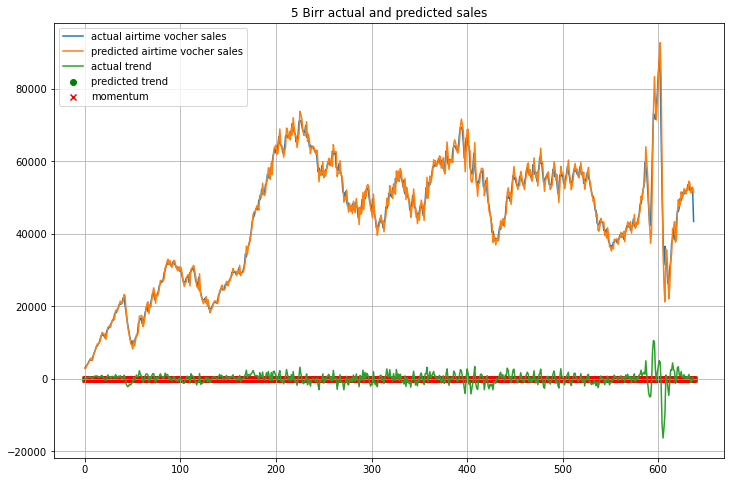

330
637
0.5180533751962323


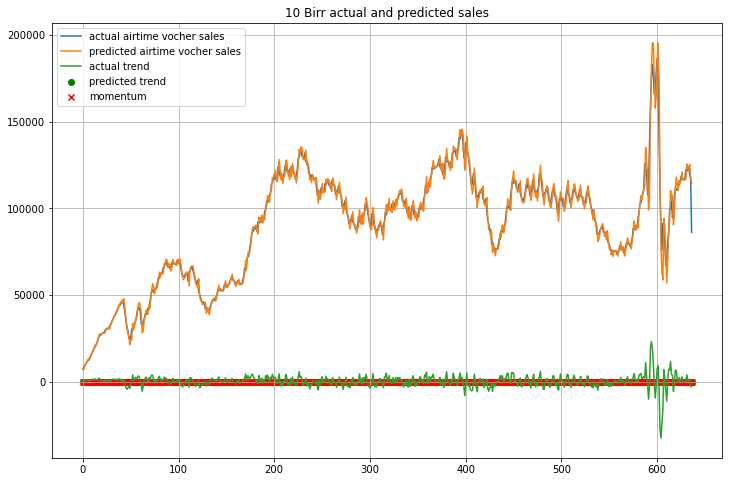

316
628
0.5031847133757962


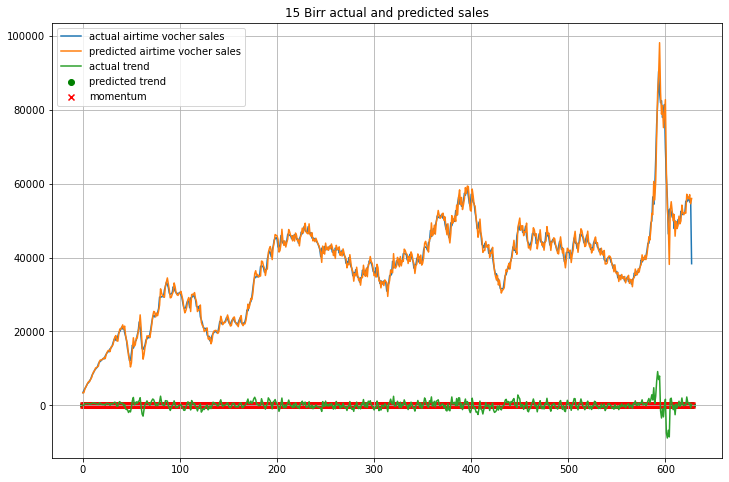

309
637
0.4850863422291994


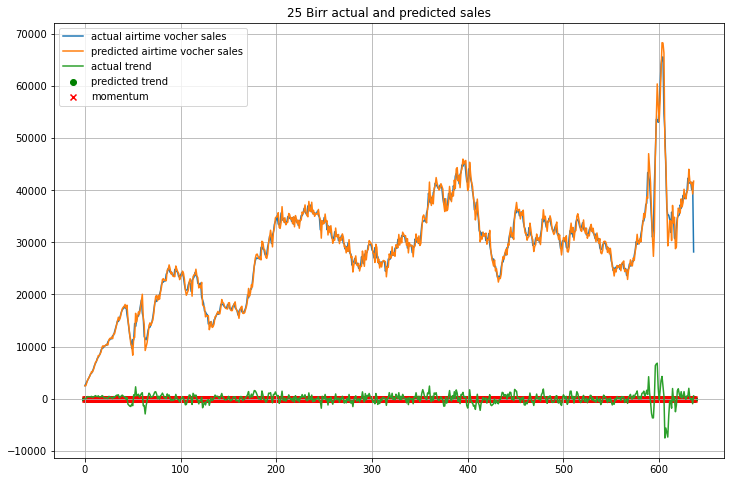

309
636
0.4858490566037736


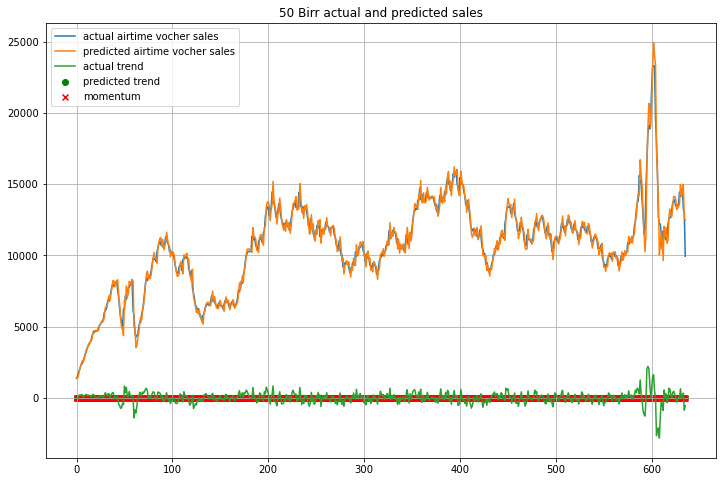

In [200]:
perfom_kalman('birr_5_dataset.csv', "5")
perfom_kalman('birr_10_dataset.csv', "10")
perfom_kalman('birr_15_dataset.csv', "15")
perfom_kalman('birr_25_dataset.csv', "25")
perfom_kalman('birr_50_dataset.csv', "50")
